In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
_ = !unzip "/content/test_img.zip" -d "/content/test_img"

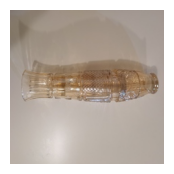

This is an image of glass. This transparent hero is 100% recyclable!


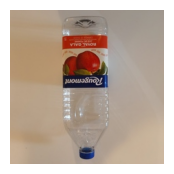

This is an image of glass. This transparent hero is 100% recyclable!


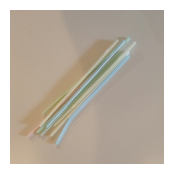

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


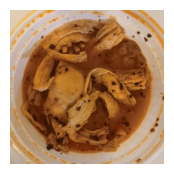

This is an image of food waste. It's the superstar of organic waste. Send it to the green bin where it belongs!


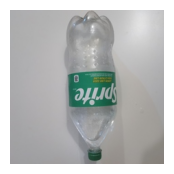

This is an image of glass. This transparent hero is 100% recyclable!


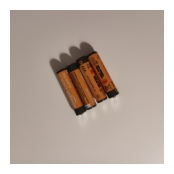

This is an image of batteries. Watch out, they are unrecyclable and hazardous!


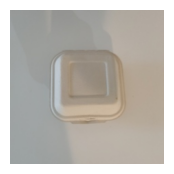

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


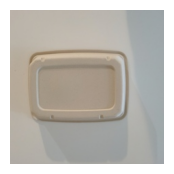

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


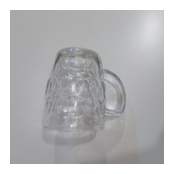

This is an image of plastic bottle. This recyclable champion is ready for a second life after finished!


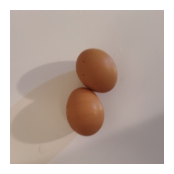

This is an image of egg shell. It's the best buddy with organic waste!


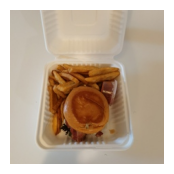

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is non-recyclable!


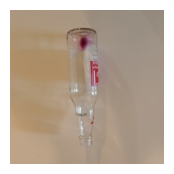

This is an image of glass. This transparent hero is 100% recyclable!


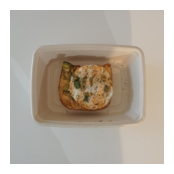

This is an image of tea bag. It belongs to organic waste. Green tea, green bin. Easy task!


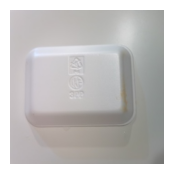

This is an image of styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!


In [ ]:
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model.load_state_dict(torch.load('fine_tuned_resnet18_after.pth', map_location=torch.device('cpu')))
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

target_class = ["batteries. Watch out, they are unrecyclable and hazardous!",
          "egg shell. It's the best buddy with organic waste!",
          "food waste. It's the superstar of organic waste. Send it to the green bin where it belongs!",
          "glass. This transparent hero is 100% recyclable!",
          "plastic bottle. This recyclable champion is ready for a second life after finished!",
          "plastic straws. These cute-looking guys are made of plastic, but non-recyclable!",
          "styrofoam container. Let me see. Hmm... This kind of styrofoam container is non-recyclable!",
          "styrofoam container. Let me see. Hmm... This kind of styrofoam container is recyclable!",
          "styrofoam cups. It is recyclable after use. Don't forget, that means blue bin!",
          "tea bag. It belongs to organic waste. Green tea, green bin. Easy task!"]
'''
target_class = ["non-recyclable waste.",
          "organic waste.",
          "organic waste.",
          "recyclable waste.",
          "recyclable waste.",
          "non-recyclable waste.",
          "non-recyclable waste.",
          "recyclable waste.",
          "recyclable waste.",
          "organic waste."]
'''

folder = '/content/test_img'
for filename in os.listdir(folder):
  img_path = os.path.join(folder, filename)
  image = Image.open(img_path)
  input_tensor = transform(image)
  input_batch = input_tensor.unsqueeze(0)
  with torch.no_grad():
    output = model(input_batch)
  _, predicted_class = torch.max(output, 1)

  plt.figure(figsize=(2, 2))
  plt.imshow(image)
  plt.axis('off')
  plt.show()
  print(f'This is an image of {target_class[predicted_class.item()]}')